<a href="https://colab.research.google.com/github/natrese/Estad-stica/blob/main/Parte_pr%C3%A1ctica_tercer_examen_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte práctica tercer examen parcial**


*   Nombres: Keren Slendy Rodríguez
*   Angie Sofía Fonseca
*   Nathalia Remolina



# **Introducción**

Este estudio se enmarca en la Encuesta Longitudinal de Protección Social (ELPS) realizada en Colombia en 2012. La encuesta, que incluyó a 49,549 individuos de 15,784 hogares, proporciona datos detallados sobre diversos aspectos del bienestar social, como la alimentación, el cuidado y la asistencia a instituciones educativas para niños menores de cinco años.

La principal motivación de esta investigación es evaluar y mejorar las políticas públicas de protección social en Colombia, con un enfoque especial en los menores de cinco años. Específicamente, se pretende identificar los factores que influyen en la probabilidad de que un niño reciba citas de control de crecimiento y desarrollo.

Se espera que esta investigación contribuya al conocimiento sobre la protección social en Colombia y ofrezca recomendaciones basadas en datos para optimizar la atención y el cuidado de los menores, asegurando su desarrollo integral y bienestar.





# **Metodología**
Para alcanzar los objetivos anterirmente mensionados, se emplearán diversos modelos de clasificación y regresión, incluyendo: redes neuronales multicapa, Random Forest, Naive Bayes y Máquinas de Soporte Vectorial (SVM). Estos modelos ayudarán a identificar patrones y a predecir la asistencia a citas de control de crecimiento y desarrollo, proporcionando una herramienta valiosa para la toma de decisiones en políticas públicas y programas sociales destinados a mejorar la calidad de vida de los niños. A continuación se mostrarán los códigos utilizados para cada paso.

# **Resultados y análisis de resultados**
Por medio de la implementación de los diferentes modelos de clasificación y regresión se obtendrán los resultados necesarios, seguidos del análisis de cada uno de ellos.

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving D. MENORES.txt to D. MENORES.txt


In [ ]:
import pandas as pd
import io
datos_menores = pd.read_csv(io.BytesIO(uploaded['D. MENORES.txt']), delimiter='\t')
datos_menores.head(5)

,Directorio,Nro_encuesta,Secuencia_encuesta,Secuencia_p,Orden,P51,P52,P52s1,P53,P54,...,P8582s3,P8582s4,P8582s11,P8582s6,P8582s7,P8582s9,P8582s12,P8582s10,P8582s10a1,Fex_c
0,447,247,4,1,4,4,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1454.129389
1,17255,247,3,1,3,1,NaN,NaN,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663.046128
2,373,247,5,1,5,1,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.021859
3,373,247,4,1,4,1,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.021859
4,226,247,3,1,3,2,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,912.997171


In [ ]:
datos_menores.P52.isnull()

0       False
1        True
2        True
3        True
4       False
        ...  
4086    False
4087    False
4088     True
4089    False
4090    False
Name: P52, Length: 4091, dtype: bool

El análisis inicial del código indica que las filas marcadas con "True" contienen valores faltantes. Para solucionar esto, emplearemos el siguiente código que eliminará dichos valores.

In [ ]:
datos_menores.loc[datos_menores.P52.notnull(), "P52"]

0       5.0
4       5.0
5       5.0
6       5.0
7       4.0
       ... 
4085    4.0
4086    4.0
4087    1.0
4089    5.0
4090    5.0
Name: P52, Length: 2724, dtype: float64

Utilizando el comando ".loc", estamos seleccionando filas específicas de nuestro DataFrame en Python. En este caso, estamos filtrando las filas que no tienen valores nulos en la columna "P52".

In [ ]:
tabla_menores = datos_menores[["P51", "P52", "P55", "P56", "P57", "P6159s8", "P6163s8", "P6161", "P6161s1"]]
tabla_menores1 = tabla_menores[tabla_menores.P52.notnull()]
tabla_menores1.head(5)

,P51,P52,P55,P56,P57,P6159s8,P6163s8,P6161,P6161s1
0,4,5.0,1,1,1,NaN,NaN,1,6.0
4,2,5.0,1,1,1,NaN,NaN,1,3.0
5,2,5.0,1,1,1,1.0,1.0,1,1.0
6,2,5.0,1,1,1,NaN,NaN,1,4.0
7,2,4.0,1,1,1,NaN,NaN,1,1.0




*   En la primera línea de código, utlizamos las columnas "P51", "P52", "P55", "P56", "P57", "P6159s8","P6163s8", "P6161" y "P6161s1".
*   En la segunda línea, seleccionamos las filas NO nulas de "P52". Mediante el comando "notnull" se evidencian las filas que no son nulas.

Así tenemos que la variable "P52" no tenga valores nulos.





In [ ]:
tabla_menores1.P52.value_counts()

P52
5.0    1597
4.0     647
1.0     229
3.0     119
2.0      70
6.0      62
Name: count, dtype: int64


Con el comando "value_counts()", podemos contar la frecuencia de cada valor en la variable. Así, podemos confirmar que no hay valores faltantes.

In [ ]:
tabla_menores1.P6159s8.isnull() # Las madres que no hacen ninguna actividad con los menores
tabla_menores1.loc[tabla_menores1.P6159s8.isnull(), "P6159s8"] = 2 # 2 denota las madres que sí hacen actividades con los hijos
tabla_menores1.P6163s8.isnull() # Los padres que no hacen ninguna actividad con los menores
tabla_menores1.loc[(tabla_menores.P6163s8.isnull()), "P6163s8"] = 2 # 2 denota los padres que sí hacen actividades con los hijos




*   En las líneas de comando 2 y 4, estamos realizando un cambio de los valores de esas variables por un 2.
- "El 2 va a significar que son aquellos padres y madres que le ayudan a sus hijos a realizar alguna actividad".



In [ ]:
tabla_menores1.P6163s8.value_counts()

P6163s8
2.0    2024
1.0     700
Name: count, dtype: int64

Efectivamente, tenemos que 1 es igual a 700 y 2 es igual a 2024, es decir no hay valores faltantes.

In [ ]:
dummi_menores = pd.get_dummies(tabla_menores1, columns=["P51", "P52", "P55", "P56", "P57", "P6159s8", "P6163s8"], dtype = float)
dummi_menores.head(6)

,P6161,P6161s1,P51_2,P51_3,P51_4,P51_5,P51_6,P51_7,P51_8,P52_1.0,...,P55_1,P55_2,P56_1,P56_2,P57_1,P57_2,P6159s8_1.0,P6159s8_2.0,P6163s8_1.0,P6163s8_2.0
0,1,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


Tengamos en cuenta que las entradas corresponden a las variables de las columnas "P51", "P52", "P55", "P56",
"P57", "P6159s8" y "P6163s8", y, la salida es la variable "P6161".

**Recordemos**: Necesitamos que nuestras variables explicativas esten dadas por 1 o 0; 1 cuando se cumple la condición y 0 cuando no se cumple la condición.

Así, para que las matrices dummi nos queden en términos de unos y ceros, ponemocolocamos que "dtype = float"

Ahora, si podemos implementar nuestro modelo

Nuestra salida es la variable "P6161", veamos ¿Qué es esta variable?

In [ ]:
tabla_menores1.P6161.value_counts()

P6161
1    2210
2     514
Name: count, dtype: int64

La variable "P6161" corresponde a "si el padre o la madre lleva a control de crecimiento y desarollo".


*   1 = **Si** llevan al niño a control de crecimiento y desarrollo
*    2 = **No** llevan al niño a control de crecimiento y desarrollo



In [ ]:
dummi_menores.columns

Index(['P6161', 'P6161s1', 'P51_2', 'P51_3', 'P51_4', 'P51_5', 'P51_6',
       'P51_7', 'P51_8', 'P52_1.0', 'P52_2.0', 'P52_3.0', 'P52_4.0', 'P52_5.0',
       'P52_6.0', 'P55_1', 'P55_2', 'P56_1', 'P56_2', 'P57_1', 'P57_2',
       'P6159s8_1.0', 'P6159s8_2.0', 'P6163s8_1.0', 'P6163s8_2.0'],
      dtype='object')

Asignemos un nuevo nombre a cada una de las variables.

In [ ]:
dummi_menores.rename(columns = {'P51_2':'acu casa', 'P51_3':'acu trab', 'P51_4':'niñera', 'P51_5':"mayor", 'P51_6':"menor", 'P51_7':"solo", 'P51_8':"otra persona"}, inplace = True)
dummi_menores.rename(columns = {'P52_1.0':"lejos", 'P52_2.0':"costoso", 'P52_3.0':"sin cupo", 'P52_4.0':"casa", 'P52_5.0':"edad", 'P52_6.0':"otro motivo"}, inplace = True)
dummi_menores.rename(columns = {'P55_1':"si desa", 'P55_2':"no desa", 'P56_1':"si alm", 'P56_2':"no alm", 'P57_1':"si onces", 'P57_2':"no onces"}, inplace = True)
dummi_menores.rename(columns = {'P6159s8_1.0':"no comp madre", 'P6159s8_2.0':"si comp madre", 'P6163s8_1.0':"no comp padre", 'P6163s8_2.0':"si comp padre"}, inplace = True)
dummi_menores.head(5)

,P6161,P6161s1,acu casa,acu trab,niñera,mayor,menor,solo,otra persona,lejos,...,si desa,no desa,si alm,no alm,si onces,no onces,no comp madre,si comp madre,no comp padre,si comp padre
0,1,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Ahora, tomemos un conjunto de datos de entrenamiento (80%) y de validación (del 20%), teniendo en cuenta que las entradas corresponden a las variables de las columnas "P51", "P52", "P55", "P56",
"P57", "P6159s8" y "P6163s8", y, la salida es la variable "P6161".

In [ ]:
# "P51", "P52", "P55", "P56", "P57", "P6159s8" y "P6163s8", y, la salida es la variable "P6161"
x = dummi_menores.drop(["P6161", 'P6161s1'], axis = 1)
y = dummi_menores["P6161"].astype(str)
y.loc[(y == "1")] = "Si"
y.loc[(y == "2")] = "No"
y.value_counts()

P6161
Si    2210
No     514
Name: count, dtype: int64



*   Las varibles explicativas son todas, menos aquellas variables que tienen relación con: que el menor reciba atención o no.
*   En la variable "y", se tomará únicamente como variable respuesta "P6161", esta sera la variable de salida de nuestra red.
- Con el comando "y.value_counts()" verificamos que efectivamente tenemos que todos los valores se cambian por "si" y por "no".



Ahora, realizaremos el entrenamiento de nuestra red, pero antes, necesitamos escoger el conjunto de datos de entrenamiento y el conjunto de datos de validación.

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

Como ya obtuvimos los datos de entrenamiento (80%) y los datos de validación (20%). Ahora podemos implementar una red neuronal multicapa.

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,50,50, 50, 50, 50, 50),
                        max_iter = 300, activation = 'logistic',
                        solver = 'sgd') # Curva de pérdida adam o sgd

Se ha implementado el modelo, por lo tanto debemos ajustar la red.

In [ ]:
mlp_clf.fit(trainX, trainY) # Estimación de los parámetros sobre los datos de entrenamiento
y_pred = mlp_clf.predict(testX) # Predicción sobre los datos de validación (comparar la predicción con los datos de validación)


In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred, testY)))

Accuracy: 0.84


Acá vemos reflejado que tenemos una exactitud del 84%. (BUENA).

Text(0.5, 1.0, 'Confusion Matrix')

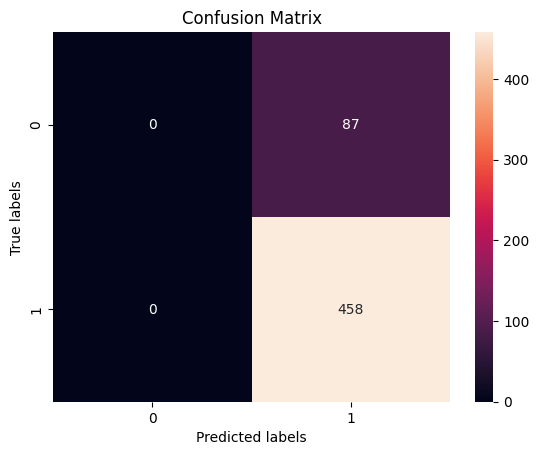

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)
cm
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

Aquí, tenemos la matriz de confusion.
¿Qué podemos observar en la matriz de confusión?


*   Para los valores de 1, es decir, los menores que si reciben atención médica, se esta logrando una predicción de todos los valores correctos.
*   Sin embargo, al ver el otro valor de la variable, a ningún valor le está haciendo una buena predicción.
- Mala predicción para los valores 0 de la variable.

¿Qué hacemos?
Debemos buscar un modelo donde se mejore la predicción donde los niños no reciben atención médica.




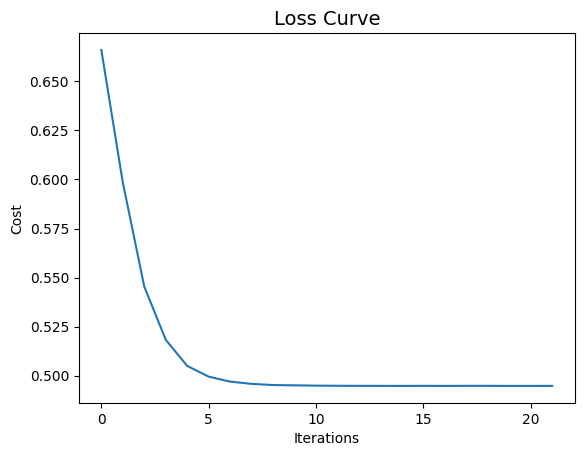

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

La curva de pérdida, Permite ver que se necesitan de pocas iteraciones, lo que significa que a pesar de que usemos una red neuronal con muchas capas no vamos a tener un buen ajuste. Por lo tanto, es conveniente tomar otro modelo.

**Modelo Random forest**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(trainX, trainY)
y_pred_random = random_forest.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_random, testY)))

Accuracy: 0.84


Podemos observar que la exactitud sigue estando igual, 84%.

Text(0.5, 1.0, 'Confusion Matrix')

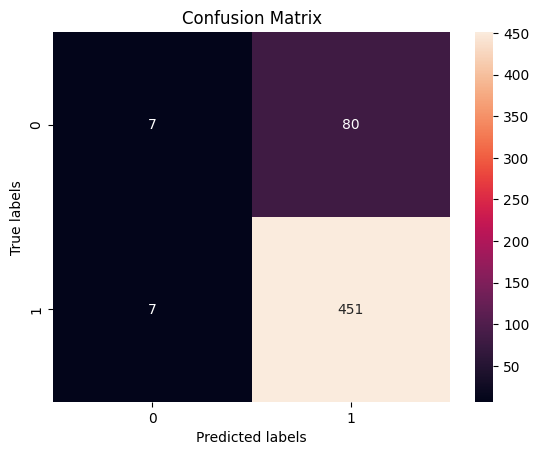

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm1 = confusion_matrix(testY, y_pred_random)
cm1
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

Por medio del algorítmo de Random Forest, se observa que hay una peor predicción para los valores de la segunda variable, pero la predicción para los primeros valores es mejor.
Luego, si queremos determinar ¿quiénes son los menores que no están siendo atendidos? pues, aqui tenemos una mejor predicción para los primeros valores de la variable = Valores "0" de la respuesta.

**Modelo Clasificador Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clase_bayes = GaussianNB()
clase_bayes.fit(trainX, trainY)
y_pred_bayes = clase_bayes.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_bayes, testY)))

Accuracy: 0.75


Aquí vemos que se logró una exactitud del 75%.
Nuevamente, miramos la matriz de confusión para establecer si se mejora o no la predicción de los valores cero de la variable respuesta.

Text(0.5, 1.0, 'Confusion Matrix')

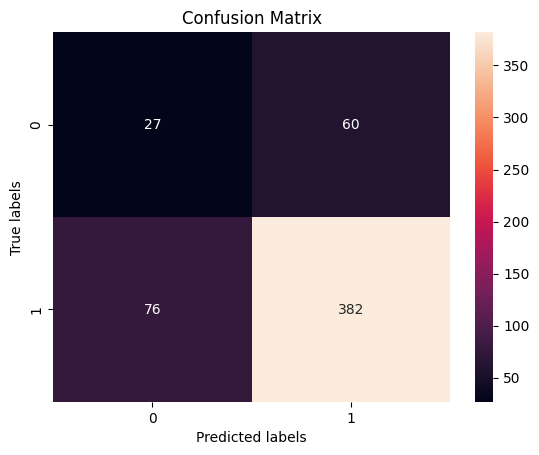

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm2 = confusion_matrix(testY, y_pred_bayes)
cm2
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

Observamos que con este modelo mejoró bastante la precisión de los valores "0" de la variable respuesta.
Por ejemplo, si queremos analizar cuántos menores no son atendidos en los hospitales cuando están enfermos, la que nos interesa es el recuadro que nos indica 27.
En resumen, aquí mejora la predicción de los valores "0" de la variable respuesta.

**Modelo de Máquina de Soporte vectorial**

In [ ]:
from sklearn.svm import SVC
soporte_vect = SVC(decision_function_shape='ovr', kernel = "rbf", degree = 3)
soporte_vect.fit(trainX, trainY)
y_pred_sopor = soporte_vect.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_sopor, testY)))

Accuracy: 0.84


Podemos observar que tiene una exactitud igual a la de Random Forest, del 84%. Pero realmente lo que nos interesa es la matriz de confusión que veremos a continuación.

Text(0.5, 1.0, 'Confusion Matrix')

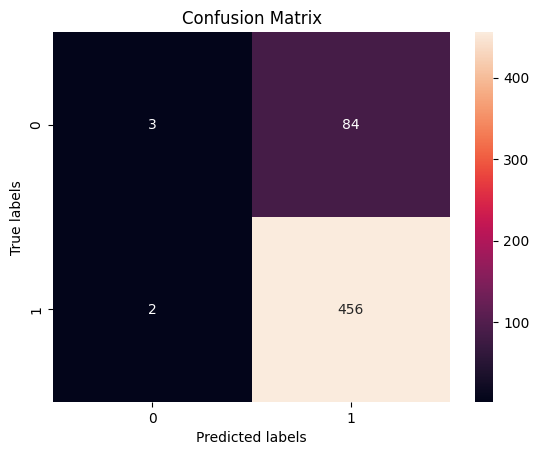

In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm2 = confusion_matrix(testY, y_pred_sopor)
cm2
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')


Con este modelo vemos que se perdió el buen ajuste para los valores "0" de la variable respuesta.

Teniendo en cuenta las predicciones del ítem
anterior, si quieremos realizar un modelo para predecir que menores no son atendidos en los hospitales tomamos el **modelo Clasificador Naive Bayes**

Ahora, observemos las columnas de la predicción del entrenamiento de X.

In [ ]:
trainX.columns

Index(['acu casa', 'acu trab', 'niñera', 'mayor', 'menor', 'solo',
       'otra persona', 'lejos', 'costoso', 'sin cupo', 'casa', 'edad',
       'otro motivo', 'si desa', 'no desa', 'si alm', 'no alm', 'si onces',
       'no onces', 'no comp madre', 'si comp madre', 'no comp padre',
       'si comp padre'],
      dtype='object')

Tomamos el modelo en el caso que tuvimos mejor predicción que fue el Clasificador Naive Bayes, a pesar de solo tener una exactitud del 75%.

In [ ]:
import numpy as np
no_obs = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1]])
clase_bayes.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U2')

En este caso --> array(['No'], me dice que el menor no es atendido en un hospital.
Tenemos la primera condición para que el menor no sea atendido:
1. Esta solo en la casa
2. No tiene cupo
3. No desayuna
4. No almuerza
5. si toma onces
6. No comparte con la madre
7. Si comparte con el padre

In [ ]:
no_obs = np.array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
clase_bayes.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Si'], dtype='<U2')

En este caso --> **array(['Si']**, me dice que el menor si es atendido en un hospital.
Tenemos las siguientes condiciones:
1. Con su padre o madre en la casa
2. Con su padre o madre en el trabajo
3. Con la empleada o niñera en la casa
4. Al cuidado de un pariente de 18 años o más

In [ ]:
no_obs = np.array([[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
clase_bayes.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U2')

Acá por ejemplo, de nuevo nos dice que el menor no es atendido en un hospital, debido a que ya no está al cuidado de un pariente igual o mayor a 18 años pero si esta al cuidado de un pariente menor de 18 años

**Conclusión**

Mediante el análisis de los datos de la Encuesta Longitudinal de Protección Social (ELPS) 2012 mediante el clasificador Naive Bayes ha demostrado ser muy efectivo, logrando una precisión del 75% en la predicción de la asistencia de los niños a citas de control de crecimiento y desarrollo. Los resultados destacan la relevancia de factores como las actividades de los padres y la asistencia a instituciones educativas en la probabilidad de que un niño reciba atención médica regular. La presencia de los padres o de un adulto responsable en el entorno del niño se identificó como un factor crucial para garantizar dicha atención.

Estos hallazgos no solo confirman la utilidad de los algoritmos de aprendizaje automático para el análisis de datos sociales, sino que también proporcionan información valiosa para el diseño e implementación de políticas públicas más efectivas. Al identificar los factores clave que influyen en la recepción de atención médica, los responsables de políticas pueden desarrollar estrategias más precisas y enfocadas para mejorar la calidad de vida de los niños en situación de vulnerabilidad. En definitiva, la integración de técnicas avanzadas de análisis de datos en la protección social tiene el potencial de generar mejoras significativas en la salud y el bienestar de las poblaciones más necesitadas.

**Referencia bibliografíca**

*Colombia - Encuesta longitudinal de Protección Social* - ELPS 2012. (2017, 25 septiembre). https://microdatos.dane.gov.co/index.php/catalog/194/study-description